In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import warnings
import re
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from bokeh.io import show, output_file,output_notebook
from bokeh.plotting import figure,output_notebook,show
from bokeh.models import ColumnDataSource, HoverTool
from IPython.display import HTML
import squarify
from collections import Counter

warnings.filterwarnings('ignore')

In [2]:
#conda install -c conda-forge wordcloud=1.8.1 

In [3]:
viz=pd.read_csv('Clean_data')
viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6588 entries, 0 to 6587
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          6588 non-null   object 
 1   Name           6588 non-null   object 
 2   Rating         6355 non-null   float64
 3   Price          6588 non-null   object 
 4   Link           6588 non-null   object 
 5   ID             6588 non-null   int64  
 6   Reviews        6355 non-null   float64
 7   Ingredient     6588 non-null   object 
 8   Main_Category  6588 non-null   object 
 9   Category       6588 non-null   object 
 10  Details        6588 non-null   object 
 11  Image          6588 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 617.8+ KB


In [4]:
#?WordCloud

In [5]:
ing=viz['Ingredient'][0]
ing

'Water/Aqua/Eau, Hydrogenated Polyisobutene, Glyceryl Oleate Citrate, Mica, Hydroxyethyl Acrylate/Sodium Acryloyldimethyl Taurate Copolymer, Glycerin, Ribes Nigrum (Black Currant) Seed Oil, Sclerocarya Birrea Seed Oil, Theobroma Cacao (Cocoa) Extract, Caprylic/Capric Triglyceride, Vitis Vinifera (Grape) Seed Extract, Lecithin, Acetyl Tetrapeptide-17, Linoleic Acid, Linolenic Acid, Sorbitan Isostearate, Camellia Sinensis Leaf Extract, Maltodextrin, Sodium Hyaluronate Crosspolymer, Magnolia Officinalis Bark Extract, Glutamylamidoethyl Imidazole, Colloidal Platinum nano, Tocopherol, Phenoxyethanol, Pentylene Glycol, Sodium Benzoate, Sorbic Acid, Caprylyl Glycol, Boron Nitride, Hexylene Glycol, Polysorbate 60, Ethylhexylglycerin, CI 77491 (Iron Oxides), CI 77492 (Iron Oxides), CI 77499 (Iron Oxides), Sodium C14-16 Olefin Sulfonate.'

In [6]:
ing_list="".join(ing for ing in viz.Ingredient)
print ("There are {} ingredient words in the combination of all products.".format(len(ing_list)))

There are 4931756 ingredient words in the combination of all products.


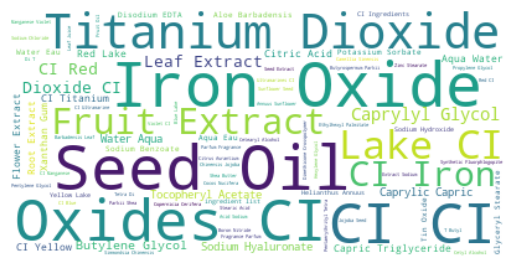

In [328]:
#Wodloud of Ingredients
stopwords=set(STOPWORDS)
stopwords.update(['May','Contain'])

cloud=WordCloud(max_font_size=50,stopwords=stopwords,background_color='white').generate(ing_list)
cloud.to_file('Image/wordcloud.png')

plt.figure()
plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

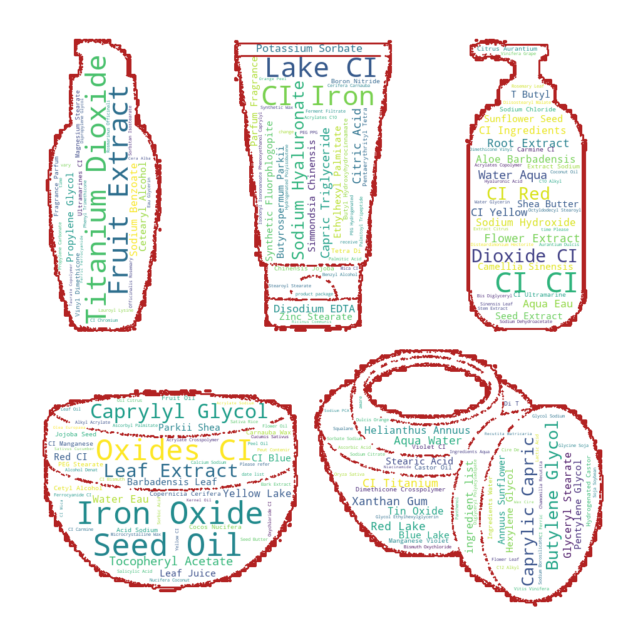

In [329]:
#Ingredient Cloud in Bottle Shapes'
bottle=np.array(Image.open("Image/bottle.jpeg"))
bottle_cloud=WordCloud(max_font_size=50,stopwords=stopwords,background_color='white',
                       contour_width=2,contour_color='firebrick',mask=bottle
                      ).generate(ing_list)

bottle_cloud.to_file("Image/bottle_cloud.png")
plt.figure(figsize=(10,8))
plt.imshow(bottle_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [4]:
suncare=viz[viz['Category']=='Suncare']
# Reset index
suncare.shape
counts=CountVectorizer().fit_transform(suncare['Ingredient'])
counts.shape

# Dimension reduction with t-SNE
model = TSNE(n_components=2, learning_rate=200, random_state=42)
tsne_features = model.fit_transform(counts)

# Make X, Y columns 
suncare['X'] = tsne_features[:, 0]
suncare['Y'] = tsne_features[:, 1]

# Make a source and a scatter plot  
source = ColumnDataSource(suncare)
suncare_plot = figure(x_axis_label = 'T-SNE 1', 
              y_axis_label = 'T-SNE 2', #title='Mapping suncare products',
              width = 500, height = 400)
suncare_plot.circle(x = 'X', 
    y = 'Y', 
    source = source, 
    size = 10, color = '#FF7373', alpha = .8)

# Create a HoverTool object
hover = HoverTool(tooltips = [('Item', '@Name'),
                              ('Brand', '@Brand'),
                              ('Price', '$@Price'),
                              ('Rating', '@Rating')])
suncare_plot.add_tools(hover)

#Suncare product ingredient map
output_notebook()
show(suncare_plot)

Loading BokehJS ...

In [337]:
output_file('Image/comparing_cosmetic.html')

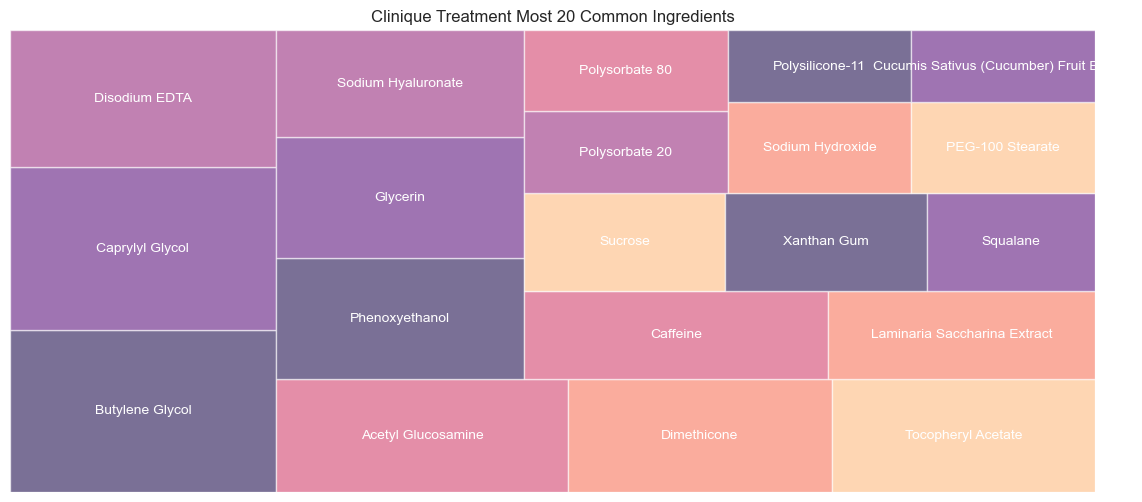

In [41]:
#Treemap
treatment=viz[viz['Category']=='Treatment & Serums'][['Brand','Ingredient']]
treatment_group=treatment.groupby('Brand')['Ingredient'].apply(",".join)

clinique=treatment_group.loc['Clinique']
l1=re.split(', |{\}|{;}|{.}',clinique)
counter=Counter(l1).most_common(20)
label1=[word for word,cnt in counter]
sizes1=[cnt for word,cnt in counter]


sns.set_style(style="whitegrid")
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)

values = [250, 120, 280, 320, 140, 95]
colors=sns.color_palette("magma", len(values))
squarify.plot(sizes=sizes1, label=label1,color=colors, alpha=0.6,ax=ax,
              text_kwargs = {'fontsize': 10, 'color': 'white'}
             ).set(title='Clinique Treatment Most 20 Common Ingredients')
plt.axis('off')
plt.show()

In [43]:
#pip install squarify

In [42]:
#Exclude product with <10 reviews
viz=viz[viz.Reviews>10]
viz['Rating'].value_counts()

4.6    790
4.5    761
4.7    623
4.4    614
4.3    560
4.2    443
4.8    298
4.1    298
4.0    219
3.9    172
4.9    136
3.8    123
3.7     97
3.6     83
3.5     59
3.4     52
5.0     37
3.3     30
3.2     25
3.1     25
3.0     14
2.8     10
2.9      7
2.7      7
2.3      6
2.4      5
2.5      3
2.6      3
2.1      3
2.2      2
1.6      1
1.9      1
2.0      1
1.8      1
Name: Rating, dtype: int64

Text(0.5, 1.0, 'Histogram of Star Rating for All products')

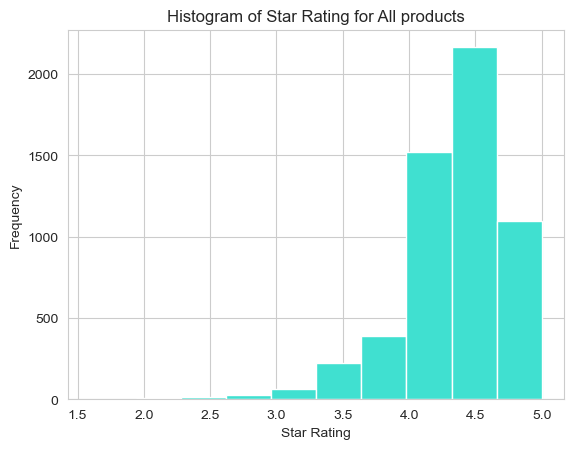

In [44]:
viz.Rating.plot.hist(color='turquoise')
plt.xlabel('Star Rating')
plt.title('Histogram of Star Rating for All products')

Text(0.5, 1.0, 'Average Star for Each Category')

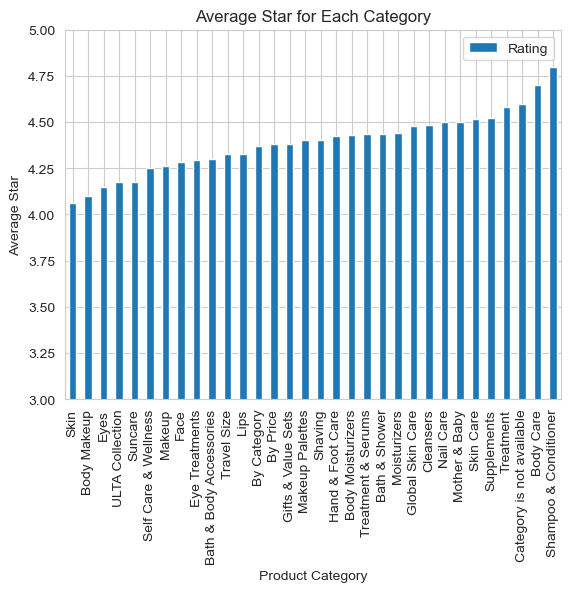

In [45]:
df_star=viz.groupby('Category').agg({'Rating':'mean'}).sort_values(by='Rating')
df_star.plot.bar()
plt.xlabel('Product Category')
plt.ylabel('Average Star')
plt.ylim(3,5)
plt.title('Average Star for Each Category')

Text(0.5, 1.0, 'Top 20 Star Rating Brand')

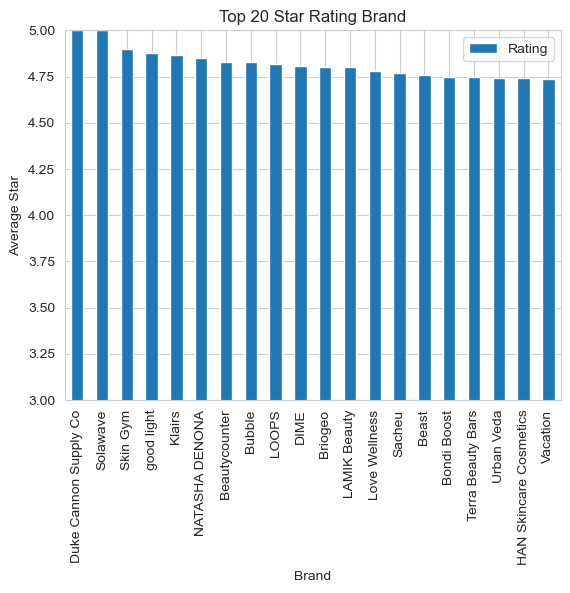

In [46]:
df_brand=viz.groupby('Brand').agg({'Rating':'mean'}).sort_values(by='Rating',ascending=False)
df_brand.iloc[:20].plot.bar()
plt.xlabel('Brand')
plt.ylabel('Average Star')
plt.ylim(3,5)
plt.title('Top 20 Star Rating Brand')